In [1]:
import sqlalchemy
import pandas as pd
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import csv
from sqlalchemy import create_engine

In [ ]:
engine = sqlalchemy.create_engine('sqlite:///../db/azure_packing_trace.db')
connection = engine.connect()

In [2]:
taskdf = pd.read_csv("../outputs/tasklist2.csv")
vmdf = pd.read_csv("../outputs/assignedinstancelist2.csv")
vmtypedf = pd.read_csv("../outputs/vmlist3.csv")

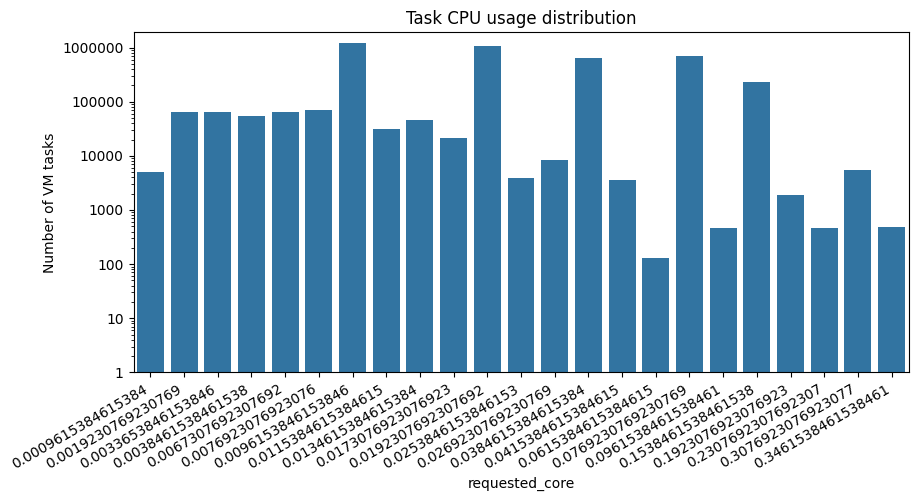

In [3]:
cpu_count = taskdf['requested_core'].value_counts()
fig = plt.figure(figsize=(10, 5))

sns.barplot(x=cpu_count.index, y=cpu_count.values)
plt.yscale('log')
plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000], ['1', '10', '100', '1000', '10000', '100000', '1000000'])
plt.ylabel('Number of VM tasks')
plt.title('Task CPU usage distribution')
fig.autofmt_xdate()


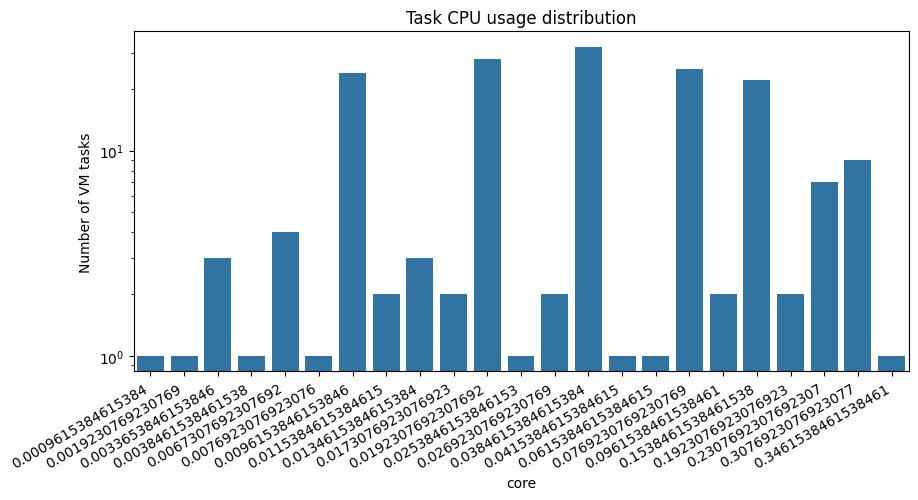

In [12]:
cpu_count_vm = vmtypedf['core'].value_counts()
fig = plt.figure(figsize=(10, 5))

sns.barplot(x=cpu_count_vm.index, y=cpu_count_vm.values)
plt.yscale('log')
# plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000], ['1', '10', '100', '1000', '10000', '100000', '1000000'])
plt.ylabel('Number of VM tasks')
plt.title('Task CPU usage distribution')
fig.autofmt_xdate()

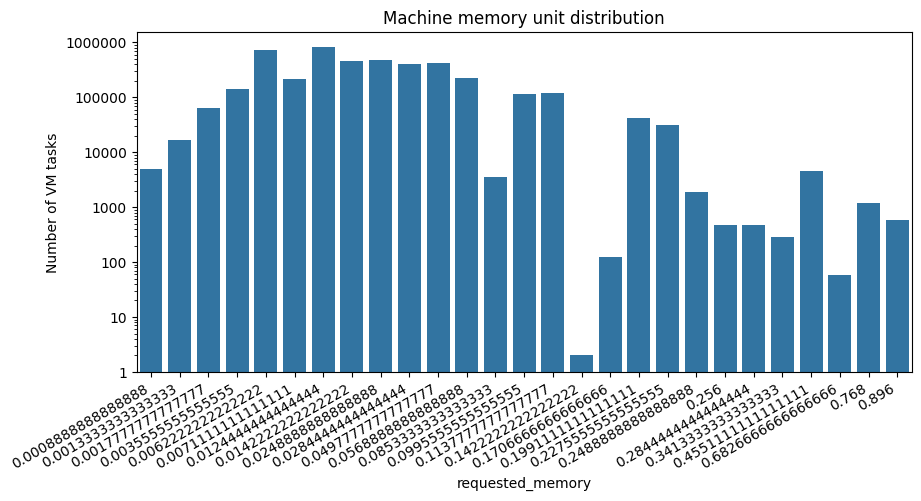

In [4]:
memory_count = taskdf['requested_memory'].value_counts()
fig = plt.figure(figsize=(10, 5))

sns.barplot(x=memory_count.index, y=memory_count.values)
plt.yscale('log')
plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000], ['1', '10', '100', '1000', '10000', '100000', '1000000'])
# plt.xticks([0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1], ['0', '0.125', '0.25', '0.375', '0.5', '0.625', '0.75', '0.875', '1'])
plt.ylabel('Number of VM tasks')
plt.title('Machine memory unit distribution')
fig.autofmt_xdate()


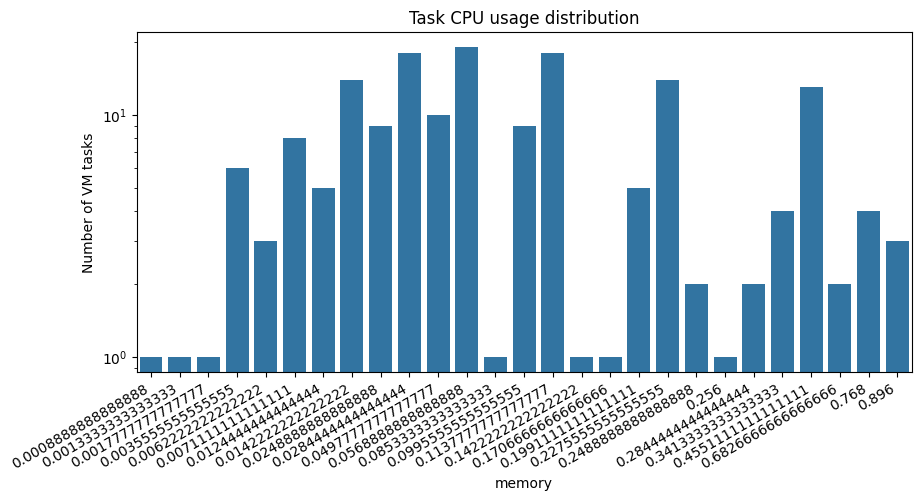

In [11]:
memory_count_vm = vmtypedf['memory'].value_counts()
fig = plt.figure(figsize=(10, 5))

sns.barplot(x=memory_count_vm.index, y=memory_count_vm.values)
plt.yscale('log')
# plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000], ['1', '10', '100', '1000', '10000', '100000', '1000000'])
plt.ylabel('Number of VM tasks')
plt.title('Task CPU usage distribution')
fig.autofmt_xdate()

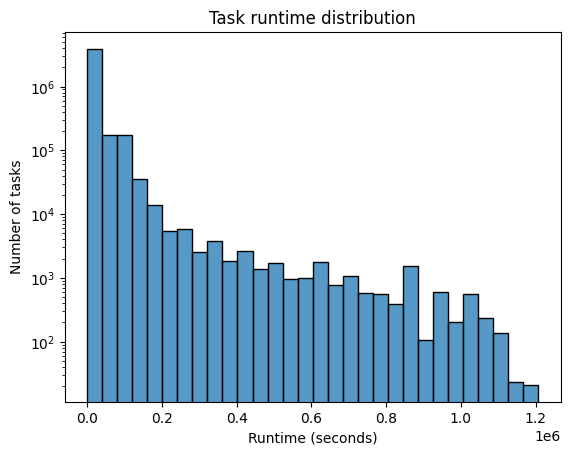

In [17]:
sns.histplot(taskdf['runtime'], bins=30)
plt.yscale('log')
plt.ylabel('Number of tasks')
plt.xlabel('Runtime (seconds)')
plt.title('Task runtime distribution')
plt.show()

In [5]:
taskdf['runtime'].describe()


count    4.314532e+06
mean     1.512167e+04
std      5.133247e+04
min      3.101975e-02
25%      6.089725e+02
50%      1.810872e+03
75%      6.924507e+03
max      1.206486e+06
Name: runtime, dtype: float64

Make new column runtime which is derived from endtime - starttime

In [15]:
connection.close()